In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import geopandas as gpd
import geodatasets

from shapely.geometry import Point

# Working with Spatial Data and Network Analysis
*Reading, exploring and analyzing, feature extraction*

**Table of Contents**
* Geospatial data
    * Reading and exploring
    * Projections
    * Visualization
        - Scatter plots
        - Choropleth maps
* Network analysis
    * Graphs, types of graphs
    * Shortest path between nodes
    * Centrality
    * Communities
    

## Geospatial Data 
*Exploring, analyzing and visualizing*

* Data that has a geographic component to it
    * Most commonly: coordinates (latitude, longitude)  → **Geocoding** ↔ Turns adress data into coordinates values
    * Sometimes: country, city, ZIP code, address
    * Not necessarily on Earth ([Google Mars](https://www.google.com/mars/))
* Sources
    * Satellite images
    * GPS data
    * Geotagging (e.g., photos at Facebook)
    * Manual entry, etc.
* Working with spatial data isn't trivial…
    * E.g., we need geometry on a sphere to calculate distances
    * … but we have libraries that make our lives easier

**Geocoding** → Turns adress data into coordinates values. For example, the adress of SoftwareUniversity in Bulgaria is 
Aleksandar Malinov Boulevard 78, eт. 1, 1799 American college, Sofia, Bulgaria  →  coordinates values (42.63622531723286, 23.369816505786)

**Reverse Geocoding** → The process of converting a location as described by geographic coordinates (latitude, longitude) to a human-readable address or place name.

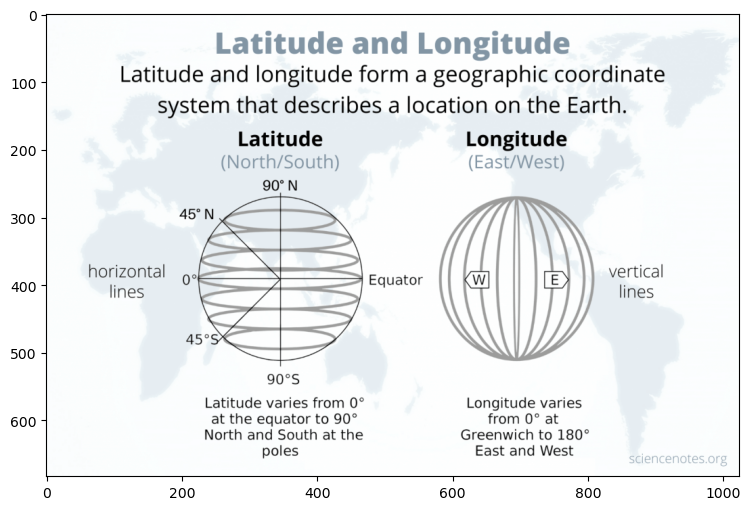

In [3]:
geo_lat = plt.imread("Materials/Latitude_Longitude.png")

plt.figure(figsize=(10,6))
plt.imshow(geo_lat)
plt.show()

The **latitude** sign is fi ($\varphi$) and starts from the Equator where its value is 0 degrees. In the North is +90 degrees and in the South is -90 degrees.

The **longitude** is represented by lambda ($\lambda$). It´s measured from East and West and starts from the cero Meridian wich is the Greenwich Meridian.


### Reading and Exploring Geospatial Data
* In some cases, we have convenient datasets

* In other cases, it's in specific formats
    * GeoJSON, Shapefile, KML, etc.
    * Some libraries (like geopandas) can read these automatically

* Data cleaning
    * Non-spatial columns: proceed as usual
        - Tidy up the data, impute or remove missing values, explore outliers, normalize columns, etc.
    * Spatial columns: fixing or changing coordinates is easier when you visualize them

* Exploratory data analysis
    * Most commonly: look for clusters and other patterns
    * Also: compare attributes across different regions E.g., income by country


###  Plotting Data on a Map
* To plot data, we'll use the **geopandas package**.
    * conda install -c conda forge geopandas
    * conda install -c conda forge geodatasets

* Setting up and displaying a world map
    * land = gpd.read_file (geodatasets.data.naturalearth.land.url)
    * land.plot(figsize = (20, 10), color = "coral", facecolor = "aqua")
    * plt.gca().set_facecolor ("aqua")
    * plt.show()

* Projections ([docs](https://geopandas.org/en/stable/docs/user_guide/projections.html) , [EPSG](https://epsg.io/))
    * Different ways to show a sphere in a 2D plane
    * **Every projection has distortions**
    

#### Example: Earthquake Data
* Dataset: earthquakes.csv , [info](https://www.kaggle.com/datasets/usgs/earthquake-database)
    * Read the dataset, look at missing values
    * Leave only columns you're interested in 
        - ["Date", "Time", "Latitude", "Longitude", "Magnitude", "Depth"]
        
* Explore the dataset
    * Examples: how is the magnitude distributed? When and where did the most powerful earthquakes happen? What are the recent ones?
    
* Perform additional data cleaning, exploration and visualization of the non spatial columns

* Fix dates (remove invalid date format, convert to datetime
    * dt_info = earthquake_data.Date + " " + earthquake_data.Time
    * earthquake_data = earthquake_data.drop(index = dt_info[dt_info.str.len() > 20 ].index)
    * earthquake_data["Data Time"] = pd.to_datatime(earthquake_data.Date + " " + "+ earthquake_data.Time)

In [4]:
earthquake_data = pd.read_csv("Materials/earthquakes.csv")

In [5]:
earthquake_data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [6]:
earthquake_data.shape

(23412, 21)

In [7]:
earthquake_data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [8]:
# A little parenthesis
earthquake_data["Magnitude Type"].astype("category")

0         MW
1         MW
2         MW
3         MW
4         MW
        ... 
23407     ML
23408     ML
23409    MWW
23410    MWW
23411     MB
Name: Magnitude Type, Length: 23412, dtype: category
Categories (10, object): ['MB', 'MD', 'MH', 'ML', ..., 'MWB', 'MWC', 'MWR', 'MWW']

In [9]:
earthquake_data["Magnitude Type"].astype("category").dtype

CategoricalDtype(categories=['MB', 'MD', 'MH', 'ML', 'MS', 'MW', 'MWB', 'MWC', 'MWR',
                  'MWW'],
, ordered=False)

As we can see it´s converted in CategoricalDtype. This is saving the data with numbers and not with strings. This is used to save memory if the strings are long.

Now as always, we can do a little bit of exploration.

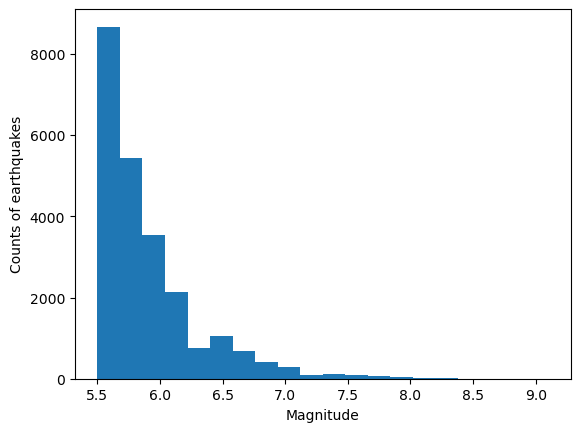

In [10]:
plt.hist(earthquake_data.Magnitude, bins = 20)
plt.xlabel("Magnitude")
plt.ylabel("Counts of earthquakes")
plt.show()

In [11]:
#show the top 5 magnitude Earthquakes
earthquake_data.nlargest(5, "Magnitude")

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
17083,12/26/2004,00:58:53,3.295,95.982,Earthquake,30.0,NaN,601.0,9.1,MW,...,NaN,22.0,NaN,NaN,1.17,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed
20501,03/11/2011,05:46:24,38.297,142.373,Earthquake,29.0,NaN,541.0,9.1,MWW,...,NaN,9.5,NaN,NaN,1.16,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed
19928,02/27/2010,06:34:12,-36.122,-72.898,Earthquake,22.9,9.2,454.0,8.8,MWW,...,NaN,17.8,NaN,NaN,1.09,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed
16,02/04/1965,05:01:22,51.251,178.715,Earthquake,30.3,NaN,NaN,8.7,MW,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic
17329,03/28/2005,16:09:37,2.085,97.108,Earthquake,30.0,NaN,510.0,8.6,MWW,...,NaN,22.1,NaN,NaN,0.91,OFFICIAL20050328160936530_30,OFFICIAL,US,OFFICIAL,Reviewed


In [12]:
# rename Pandas columns to lower case
earthquake_data.columns = earthquake_data.columns.str.lower()
earthquake_data.columns

Index(['date', 'time', 'latitude', 'longitude', 'type', 'depth', 'depth error',
       'depth seismic stations', 'magnitude', 'magnitude type',
       'magnitude error', 'magnitude seismic stations', 'azimuthal gap',
       'horizontal distance', 'horizontal error', 'root mean square', 'id',
       'source', 'location source', 'magnitude source', 'status'],
      dtype='object')

In [13]:
#replace white space everywhere
earthquake_data.columns = earthquake_data.columns.str.replace(' ', '_')
earthquake_data.columns

Index(['date', 'time', 'latitude', 'longitude', 'type', 'depth', 'depth_error',
       'depth_seismic_stations', 'magnitude', 'magnitude_type',
       'magnitude_error', 'magnitude_seismic_stations', 'azimuthal_gap',
       'horizontal_distance', 'horizontal_error', 'root_mean_square', 'id',
       'source', 'location_source', 'magnitude_source', 'status'],
      dtype='object')

In [14]:
#select only columns that I´m interested in
earthquake_dataset = earthquake_data[["date", "time", "latitude", "longitude", "magnitude", "depth"]]
earthquake_dataset

,date,time,latitude,longitude,magnitude,depth
0,01/02/1965,13:44:18,19.2460,145.6160,6.0,131.60
1,01/04/1965,11:29:49,1.8630,127.3520,5.8,80.00
2,01/05/1965,18:05:58,-20.5790,-173.9720,6.2,20.00
3,01/08/1965,18:49:43,-59.0760,-23.5570,5.8,15.00
4,01/09/1965,13:32:50,11.9380,126.4270,5.8,15.00
...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,5.6,12.30
23408,12/28/2016,09:13:47,38.3777,-118.8957,5.5,8.80
23409,12/28/2016,12:38:51,36.9179,140.4262,5.9,10.00
23410,12/29/2016,22:30:19,-9.0283,118.6639,6.3,79.00


In [15]:
# Fix dates (remove invalid date format, convert to datetime)
dt_info = earthquake_dataset.date + " " + earthquake_dataset.time

In [16]:
dt_info.str.len().sort_values(ascending = False)

20650    49
3378     49
7512     49
0        19
15605    19
         ..
7803     19
7802     19
7801     19
7800     19
23411    19
Length: 23412, dtype: int64

In [17]:
#as we can see we have 3 rows with different values that will raise an error. So the easies way is to delete them.
index = dt_info[dt_info.str.len() > 20 ].index

earthquake_dataset = earthquake_dataset.drop(index)

In [18]:
earthquake_dataset["datatime"] = pd.to_datetime(earthquake_dataset.date + " " + earthquake_dataset.time)

In [19]:
earthquake_dataset

,date,time,latitude,longitude,magnitude,depth,datatime
0,01/02/1965,13:44:18,19.2460,145.6160,6.0,131.60,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.8630,127.3520,5.8,80.00,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.5790,-173.9720,6.2,20.00,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.0760,-23.5570,5.8,15.00,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.9380,126.4270,5.8,15.00,1965-01-09 13:32:50
...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,5.6,12.30,2016-12-28 08:22:12
23408,12/28/2016,09:13:47,38.3777,-118.8957,5.5,8.80,2016-12-28 09:13:47
23409,12/28/2016,12:38:51,36.9179,140.4262,5.9,10.00,2016-12-28 12:38:51
23410,12/29/2016,22:30:19,-9.0283,118.6639,6.3,79.00,2016-12-29 22:30:19


In [20]:
earthquake_dataset.drop(columns = ["date", "time"])

,latitude,longitude,magnitude,depth,datatime
0,19.2460,145.6160,6.0,131.60,1965-01-02 13:44:18
1,1.8630,127.3520,5.8,80.00,1965-01-04 11:29:49
2,-20.5790,-173.9720,6.2,20.00,1965-01-05 18:05:58
3,-59.0760,-23.5570,5.8,15.00,1965-01-08 18:49:43
4,11.9380,126.4270,5.8,15.00,1965-01-09 13:32:50
...,...,...,...,...,...
23407,38.3917,-118.8941,5.6,12.30,2016-12-28 08:22:12
23408,38.3777,-118.8957,5.5,8.80,2016-12-28 09:13:47
23409,36.9179,140.4262,5.9,10.00,2016-12-28 12:38:51
23410,-9.0283,118.6639,6.3,79.00,2016-12-29 22:30:19


In [21]:
#earthquakes by year
earthquakes_by_year = earthquake_dataset.groupby(earthquake_dataset.datatime.dt.year).size()

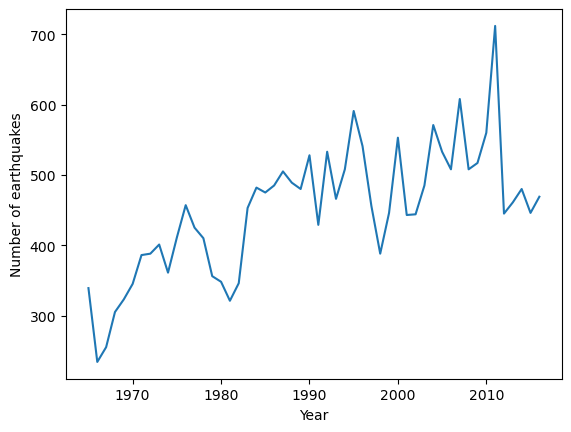

In [22]:
plt.plot(earthquakes_by_year)
plt.xlabel("Year")
plt.ylabel("Number of earthquakes")
plt.show()

### Plotting Data on a Map
* To plot data, we'll use the geopandas package
    * conda install -c conda-forge geopandas
    * conda install -c conda forge geodatasets


* Setting up and displaying a world map
    * land = gpd.read_file (geodatasets.data.naturalearth.land.url)
    * land.plot(figsize = (20, 10), color = "coral", facecolor = "aqua")
    * plt.gca().set_facecolor ("aqua")
    * plt.show()


* Projections ([docs](https://geopandas.org/en/stable/docs/user_guide/projections.html) , [EPSG](https://epsg.io/))
    * Different ways to show a sphere in a 2D plane
    * **Every projection has distortions**
    

* Data (features)
    * Use as common pandas columns Series
    
    
* Selection, projection, grouping, etc.
    * Work as expected
    
    
* Geometry
    * Points, lines, polygons
    * [Quick guide](https://geopandas.org/en/stable/docs/user_guide/data_structures.html)
    * Contains useful nfo and methods, such as area, bounds, centroids and distances
    * Allows for every easy plotting


* Using / changing projections 
    * dataframe.to_crs(name)
    * Commonly used with EPSG (4326 by default)

In [23]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [24]:
# choose from geodataset the dataset called "naturalearth"
geodatasets.data.naturalearth

{'land': {'url': 'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip',
  'license': 'CC0',
  'attribution': 'Natural Earth',
  'name': 'naturalearth.land',
  'description': 'Land polygons including major islands in a 1:110m resolution.',
  'geometry_type': 'Polygon',
  'details': 'https://www.naturalearthdata.com/downloads/110m-physical-vectors/110m-land/',
  'nrows': 127,
  'ncols': 4,
  'hash': '1926c621afd6ac67c3f36639bb1236134a48d82226dc675d3e3df53d02d2a3de',
  'filename': 'ne_110m_land.zip'}}

In [25]:
geodatasets.data.naturalearth.land

{'url': 'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip',
 'license': 'CC0',
 'attribution': 'Natural Earth',
 'name': 'naturalearth.land',
 'description': 'Land polygons including major islands in a 1:110m resolution.',
 'geometry_type': 'Polygon',
 'details': 'https://www.naturalearthdata.com/downloads/110m-physical-vectors/110m-land/',
 'nrows': 127,
 'ncols': 4,
 'hash': '1926c621afd6ac67c3f36639bb1236134a48d82226dc675d3e3df53d02d2a3de',
 'filename': 'ne_110m_land.zip'}

In [26]:
geodatasets.data.naturalearth.land.url

'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip'

In [27]:
land = gpd.read_file(geodatasets.data.naturalearth.land.url)

In [28]:
# exist other way easier to access to the dataset if you know the name
# the difference is that this way we download it
geodatasets.get_path("naturalearth.land")

'C:\\Users\\Mitko Stoychev\\AppData\\Local\\geodatasets\\geodatasets\\Cache\\ne_110m_land.zip'

In [29]:
# note that exit a datatype calles geometry
land.dtypes

featurecla      object
scalerank        int64
min_zoom       float64
geometry      geometry
dtype: object

<Axes: >

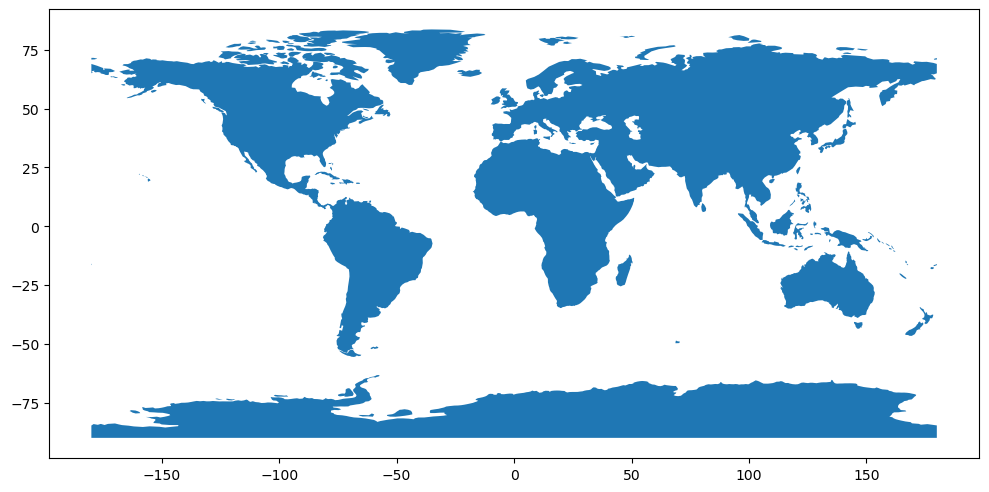

In [30]:
land.plot(figsize = (12, 10))

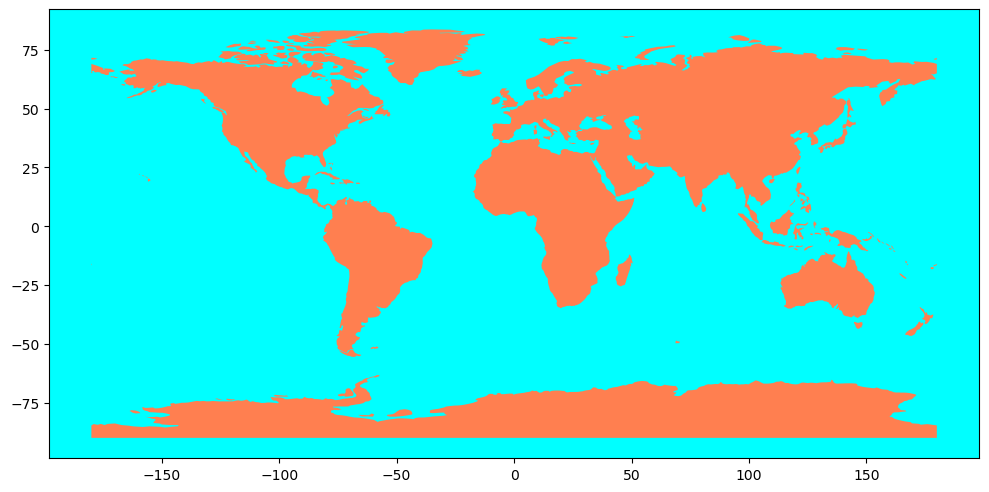

In [31]:
land.plot(figsize = (12, 10), color="coral")
plt.gca().set_facecolor("aqua")

Text(105.34722222222221, 0.5, 'Longitude')

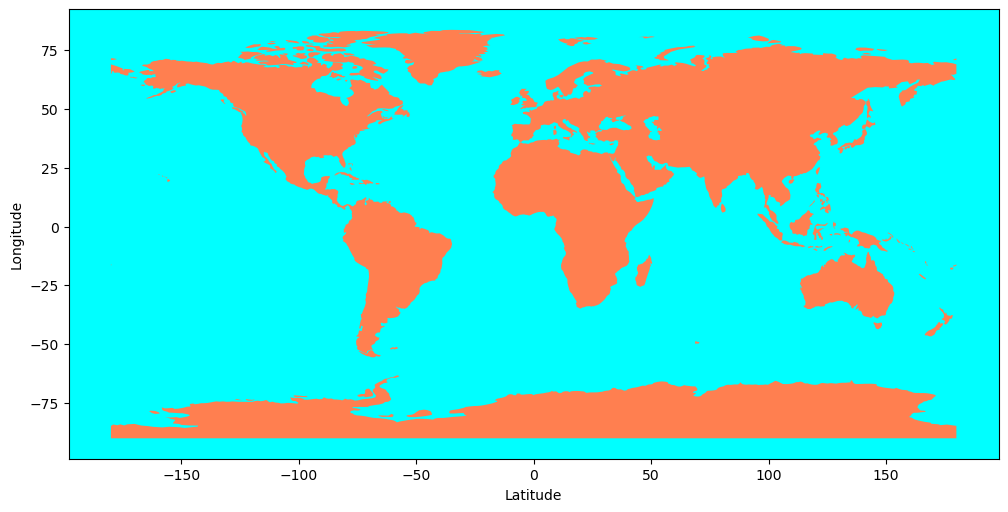

In [32]:
#notice that we´re working with axis
ax = land.plot(figsize = (12, 10), color="coral")
ax.set_facecolor("aqua")


plt.xlabel("Latitude")
plt.ylabel("Longitude")


In [33]:
# this works  .. but what are the parameters crs and geometry??
gpd.GeoDataFrame(earthquake_data)

,date,time,latitude,longitude,type,depth,depth_error,depth_seismic_stations,magnitude,magnitude_type,...,magnitude_seismic_stations,azimuthal_gap,horizontal_distance,horizontal_error,root_mean_square,id,source,location_source,magnitude_source,status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


Geopandas uses the library Shapely. There we have [geometry](https://shapely.readthedocs.io/en/stable/geometry.html#). The most used Geometry types are:
* **Point**(*args)  → A geometry type that represents a single coordinate with x,y and possibly z values.
* **LineString**([coordinates])  →  A geometry type composed of one or more line segments.
* **Polygon**([shell, holes])  →  A geometry type representing an area that is enclosed by a linear ring.

**from shapely.geometry import Point**

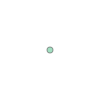

In [34]:
Point(4,3)

In [35]:
earthquake_data.latitude, earthquake_data.longitude

(0        19.2460
 1         1.8630
 2       -20.5790
 3       -59.0760
 4        11.9380
           ...   
 23407    38.3917
 23408    38.3777
 23409    36.9179
 23410    -9.0283
 23411    37.3973
 Name: latitude, Length: 23412, dtype: float64,
 0        145.6160
 1        127.3520
 2       -173.9720
 3        -23.5570
 4        126.4270
            ...   
 23407   -118.8941
 23408   -118.8957
 23409    140.4262
 23410    118.6639
 23411    141.4103
 Name: longitude, Length: 23412, dtype: float64)

In [36]:
points = []
for i, row in earthquake_data.iterrows():
    points.append(Point(row.longitude, row.latitude))  # NOTE that longitude is first!!!

In [37]:
#There is a faster way
#points = [Point(x) for x in zip(earthquake_data.longitude, earthquake_data.latitude)]

In [38]:
points

 ...]

In [39]:
earthquake_data = gpd.GeoDataFrame(data=earthquake_data, geometry=points)

<Axes: >

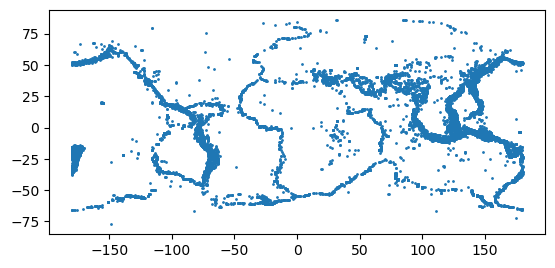

In [40]:
# note that the data is inverted
earthquake_data.plot(markersize = 1)

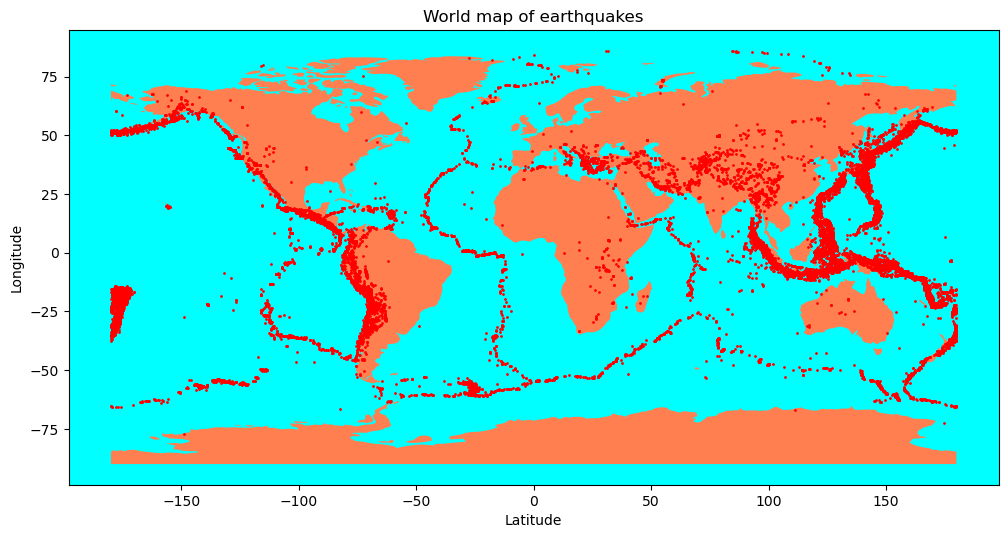

In [41]:
ax = land.plot(figsize = (12, 10), color="coral")
ax.set_facecolor("aqua")

earthquake_data.plot(ax= ax, c="r", markersize =1)

plt.title("World map of earthquakes")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [70]:
volcano_data = pd.read_csv("Materials/volcanos.csv")

In [71]:
geometry = [Point(x) for x in zip(volcano_data.Longitude, volcano_data.Latitude)]

In [72]:
volcano_data = gpd.GeoDataFrame(data=volcano_data, geometry=geometry, crs="epsg:4326")

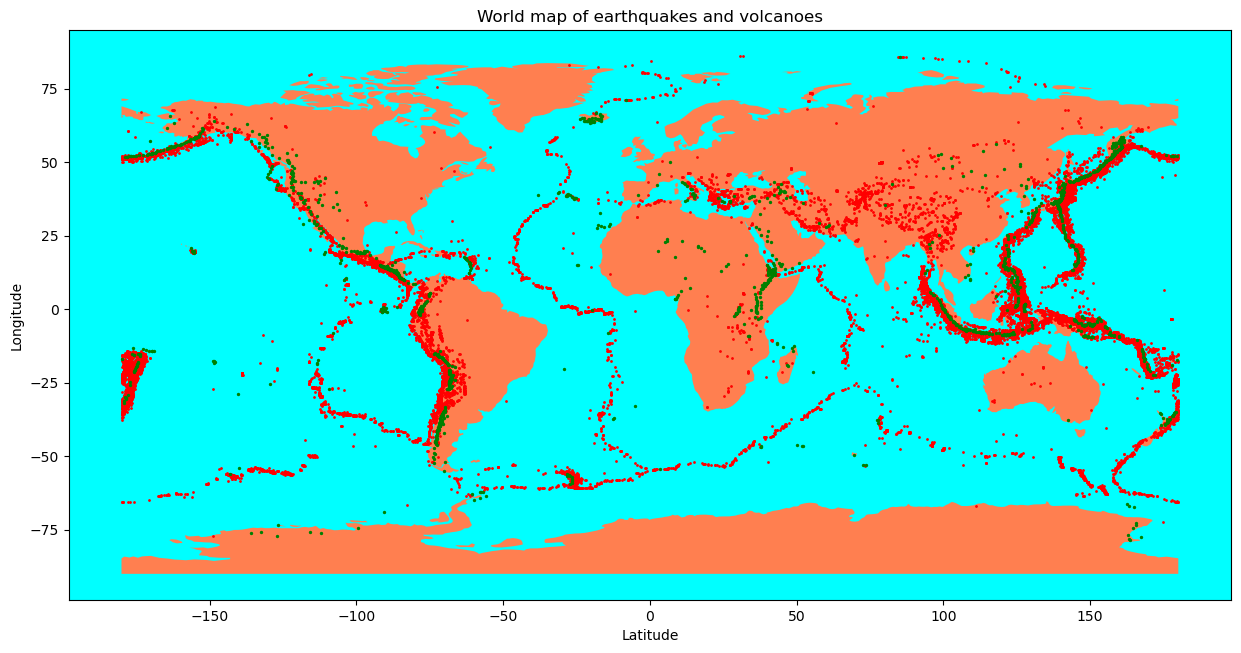

In [74]:
ax = land.plot(figsize = (15, 12), color="coral")
ax.set_facecolor("aqua")

earthquake_data.plot(ax= ax, c="r", markersize =1)
volcano_data.plot(ax = ax, c="g", markersize=2)

plt.title("World map of earthquakes and volcanoes")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

### Plotting Data on a Map (2)
* Data (features)
    * Use as common pandas columns Series
* Selection, projection, grouping, etc.
    * Work as expected
* Geometry
    * Points, lines, polygons
    * [Quick guide](https://geopandas.org/en/stable/docs/user_guide/data_structures.html)
    * Contains useful info and methods, such as area, bounds, centroids and distances
    * Allows for **very** easy plotting
* Using / changing projections
    * dataframe.to_crs(name)
    * Commonly used with EPSG (4326 by default)

### Drawing a Choropleth Map
* Like a heatmap
    * Shows different countries (or US states) in different colors according to a scale
* Dataset: ufo_sightings_scrubbed.csv , [info](https://www.kaggle.com/datasets/NUFORC/ufo-sightings)
    * Clean the data (careful with "longitude")
    * Narrow down the data to US
        - ufos = pd.read_csv("ufo_sightings_scrubbed.csv", low_memory = False)
        - ufos = ufos[["datatime", "country", "state", "latitude", "longitude"]]
        - ufos.columns = ["datatime", "country", "state", "latitude", "longitude"]
        
* Use the shape files from States_shapefile

### Drawing a Choropleth Map (2)
* Read the shape file
* Read the state names from state_names.csv
    * Use them to add the full names to the UFOs dataset
        - states = gpd.read_file("States_shapefile.shp")
        - state_names = pd.read_csv("states.csv")
        - state_names.abbreviation = state_names.abbreviation.str.lower()
        - state_names_dict = {state.abbreviation: state["name"] for index, state in state_names.iterrows()}
        - ufos.state.replace(state_names_dict, inplace =True)
* Get the number of sightings per state
    * num_sightings_by_state = ufos.groupby("state").size()
    * num_sightings_by_state.state = num_sightings_by_state.state.str.upper
    
### Drawing a Choropleth Map (3)
* Combine the two datasets
    * states = states.merge(num_sightings_by_state, left_on = "State_Name", rigth_on = "state")
    * states.plot(column = 0, legend = True, cmap = "Greens", figsize = (8, 5))

* Add text anotations
    * states["centers"] = states.geometry.apply (lambda x: x.centroid.coords[0])
    * for idx, row in states.iterrows():
        - plt.annotate(text=row["State_Code"], xy = row["centers"])
    * plt.show()
    
* Other ideas*
    * Remove Alaska / show it separately 
    * Use a transformation (e.g. sqrt)

In [161]:
ufos = pd.read_csv("Materials/ufo_sightings_scrubbed.csv", low_memory = False)
ufos.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [162]:
#remove white space at both ends:
ufos.columns = ufos.columns.str.strip()

#remove white space everywhere and replace it with underscore:
ufos.columns = ufos.columns.str.replace(' ', '_')

In [163]:
# select only the columns that are important for me
ufos = ufos[["datetime", "country", "state", "latitude", "longitude"]]
ufos

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,tx,29.8830556,-97.941111
1,10/10/1949 21:00,NaN,tx,29.38421,-98.581082
2,10/10/1955 17:00,gb,NaN,53.2,-2.916667
3,10/10/1956 21:00,us,tx,28.9783333,-96.645833
4,10/10/1960 20:00,us,hi,21.4180556,-157.803611
...,...,...,...,...,...
80327,9/9/2013 21:15,us,tn,36.1658333,-86.784444
80328,9/9/2013 22:00,us,id,43.6136111,-116.202500
80329,9/9/2013 22:00,us,ca,38.2972222,-122.284444
80330,9/9/2013 22:20,us,va,38.9011111,-77.265556


In [164]:
num_sightings_by_state = ufos.groupby("state").size()
num_sightings_by_state

state
ab     333
ak     354
al     691
ar     666
az    2689
      ... 
wi    1333
wv     486
wy     205
yk       7
yt      13
Length: 67, dtype: int64

In [171]:
type(num_sightings_by_state)   # pandas.core.series.Series

# convert it to dataseries to dataframe
num_sightings_by_state = num_sightings_by_state.reset_index().rename(columns = {0: "num_sightings"})

In [173]:
# convert states in uppercase
num_sightings_by_state.state = num_sightings_by_state.state.str.upper()
num_sightings_by_state

,state,num_sightings
0,AB,333
1,AK,354
2,AL,691
3,AR,666
4,AZ,2689
...,...,...
62,WI,1333
63,WV,486
64,WY,205
65,YK,7


Now, from National Wheather Service, we´re going to download the USA wheather file. [web here](https://www.weather.gov/gis/USStates)

In [149]:
#read shapefile with geometry
states = gpd.read_file("Materials/s_22mr22.shp")
states

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.240980,64.240190,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.439200,34.899770,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.372150,-14.264860,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.664570,34.293230,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
5,CA,California,06,-119.608180,37.245370,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
6,CO,Colorado,08,-105.547830,38.998550,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
7,CT,Connecticut,09,-72.726230,41.621960,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
8,DC,District of Columbia,11,-77.014640,38.909320,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
9,DE,Delaware,10,-75.505920,38.995590,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."


<Axes: >

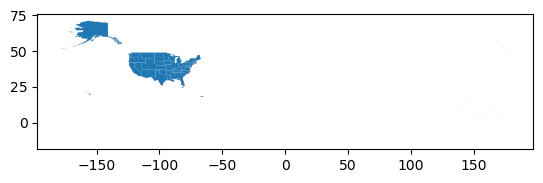

In [90]:
states.plot()

(20.0, 50.0)

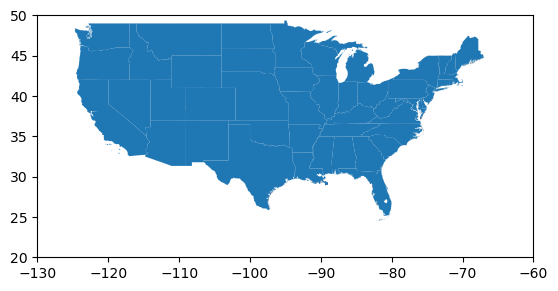

In [98]:
states.plot()
plt.xlim(-130,-60)
plt.ylim(20, 50)

#ax = states.plot()
#ax.xlim(-130,-60)
#ax.ylim(20, 50)

In [151]:
# read csv file states with states names
states_names = pd.read_csv("Materials/states.csv")
states_names

,abbreviation,name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,American Samoa
4,AZ,Arizona
5,CA,California
6,CO,Colorado
7,CT,Connecticut
8,DC,District of Columbia
9,DE,Delaware


In [174]:
# Now. let´s merge states_names with num_sigthtings
num_sightings_by_state

,state,num_sightings
0,AB,333
1,AK,354
2,AL,691
3,AR,666
4,AZ,2689
...,...,...
62,WI,1333
63,WV,486
64,WY,205
65,YK,7


In [175]:
num_sightings_by_state.merge(states_names, left_on="state", right_on="abbreviation")

,state,num_sightings,abbreviation,name
0,AK,354,AK,Alaska
1,AL,691,AL,Alabama
2,AR,666,AR,Arkansas
3,AZ,2689,AZ,Arizona
4,CA,9655,CA,California
5,CO,1505,CO,Colorado
6,CT,968,CT,Connecticut
7,DC,99,DC,District of Columbia
8,DE,183,DE,Delaware
9,FL,4200,FL,Florida


In [180]:
num_sightings_by_state.merge(states_names, left_on="state", right_on="abbreviation")[["name", "num_sightings"]]

,name,num_sightings
0,Alaska,354
1,Alabama,691
2,Arkansas,666
3,Arizona,2689
4,California,9655
5,Colorado,1505
6,Connecticut,968
7,District of Columbia,99
8,Delaware,183
9,Florida,4200


In [181]:
num_sightings_by_state = num_sightings_by_state.merge(states_names, left_on="state", right_on="abbreviation")[["name", "num_sightings"]]

In [ ]:
# now merge with states dataframe
num_sightings_by_state.merge(states, left_on="name", right_on="NAME")